## Week 11: Lecture 1

Following a review of p-values, we will use hypothesis testing to compare two samples. Throughout Week 11, we will study data about health care. Here we will try to compare two samples in a case–control study about links between smoking and infant mortality.

Unlike experiments, observational studies examine the association of properties within a population. Researchers do not control these properties. Instead researchers oberserve these properties among different groups. The groups are mothers who smoke cigarettes and mothers who do not smoke cigarettes. Here smoking is a factor that may contribute to properties like birth weight associated to infact mortality. 

In [16]:
# some data science packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Student Grades)

In [17]:
scores = pd.read_csv('scores_by_section.csv')
scores.head()

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20


In [18]:
scores.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [19]:
scores.groupby('Section').mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


Consider Section 3. Note that the average score was low.

In [20]:
observed_average = 13.6667

If we randomly sample 27 students from class, then do we obtain the same average score?

In [21]:
random_sample = sample_without_replacement(27, scores["Midterm"])
random_sample

array([18, 24, 18, 19, 12, 14, 10, 19,  4, 21, 11, 11, 11, 23, 18, 14, 19,
       17, 10, 17,  1, 15, 22, 13, 12, 13, 16], dtype=int64)

In [22]:
np.average(random_sample)

14.88888888888889

We can use hypothesis testing to compare Section 3 to the other 11 sections. 

- Null Hypothesis: Students in Section 3 were not disadvantaged on the midterm. We should attribute any variation in the outcome of the midterm scores among students in Section 3 to chance. 
- Alternative Hypothesis: We should not attribute the outcome of the midterm scores among students in Section 3 to chance. Somehow Section 3 had lower scores from the other 11 sections.

Here the test statistic is the average score in the class. We can simulate one value of the test statistic under the null hypothesis. 

In [23]:
def random_sample_average_without_replacement(number):
    random_sample = sample_without_replacement(number, scores["Midterm"])
    return np.average(random_sample)

def random_sample_average_with_replacement(number):
    random_sample = sample_with_replacement(number, scores["Midterm"])
    return np.average(random_sample)

The null hypothesis suggests that Section 3 was no different from the other 11 sections. So the average of 27 randomly chosen students should resemble the observed test statistic. We should write a function to simulate test statistics drawn at random from the population. 

In [24]:
def generate_simulations(trials, class_size, sampling_method):
    sample_averages = []

    for trial in range(trials):
        sample_averages.append(sampling_method(class_size))    
        
    return sample_averages

In [25]:
trials = 10000
class_size = 27
sampling_method = random_sample_average_without_replacement

sample_averages = generate_simulations(trials, class_size, sampling_method)

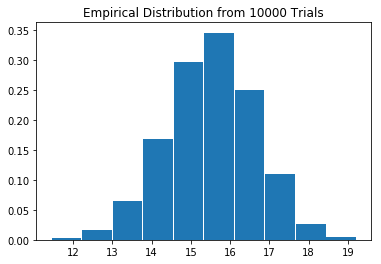

In [26]:
plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.title('Empirical Distribution from {} Trials'.format(trials));

The observed test statistic is lower than many of the stimulated test statistics. How many?

In [27]:
def calculate_pvalue(observed_test_statistic, simulated_test_statistics):
    how_many_less_than = 0

    for value in simulated_test_statistics:
        if value <= observed_test_statistic:
            how_many_less_than = how_many_less_than + 1
         
    trials = len(simulated_test_statistics)
            
    return how_many_less_than / trials

In [28]:
p_value = calculate_pvalue(observed_average, sample_averages)
p_value

0.0578

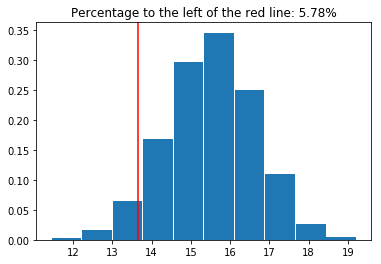

In [29]:
plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=observed_average, color = "r")
plt.title('Percentage to the left of the red line: {:2.2f}%'.format(100*p_value));

Note that we obtain similar result by sampling without replacement. While sampling without replacement is common for smaller populations, we commonly use sampling with replacement in hyptothesis testing.  

In [30]:
trials = 10000
class_size = 27
sampling_method = random_sample_average_with_replacement

sample_averages = generate_simulations(trials, class_size, sampling_method)
p_value = calculate_pvalue(observed_average, sample_averages)

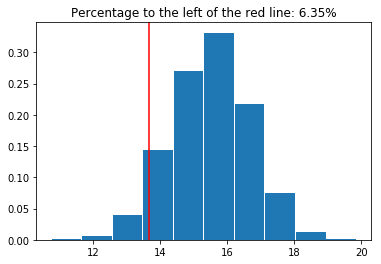

In [31]:
plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=observed_average, color = "r")
plt.title('Percentage to the left of the red line: {:2.2f}%'.format(100*p_value));

Over many trials we can simulate the test statistic to generate an empirical distributon. We decide to reject the null hypothesis for any observed statistic that lies too far to the left. However, we should avoid data snooping. Instead of looking at the data to inform the decision, we should set a threshold for the p-values before the simulation.  

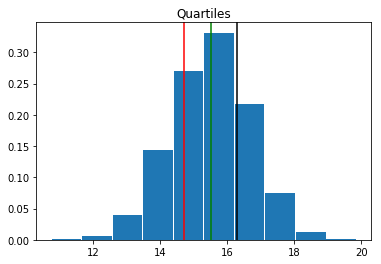

In [32]:
quartile_1 = calculate_percentile(sample_averages, 25)
quartile_2 = calculate_percentile(sample_averages, 50)
quartile_3 = calculate_percentile(sample_averages, 75)

plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=quartile_1, color = "r")
plt.axvline(x=quartile_2, color = "g")
plt.axvline(x=quartile_3, color = "k")
plt.title('Quartiles');

Remember from Week 10 Lecture 2 that quantiles are cut-points. These cut-points divide the data into subsets of equal size. We need to sort the data in increasing order to determine the cut-points. Commonly we use percentiles which divide the data into subsets of size 1/100. Let's implement a function to calculate percentiles.

In [33]:
calculate_percentile(sample_averages, 1)

12.703703703703704

In [34]:
calculate_percentile(sample_averages, 10)

14.0

If we set had set the threshold to 1st percentile then we would accept the null hypothesis. However if we set had set the threshold to 10th percentile then we would accept the null hypothesis. 

Note that we have been studying the left tail. What about Section 5 containing 33 students and observed statistic 17.45? Here the observed test statistic should lie in the right tail.

In [35]:
trials = 10000
class_size = 33
sampling_method = random_sample_average_without_replacement

sample_averages = generate_simulations(trials, class_size, sampling_method)

In [36]:
observed_average = 17.45
p_value = calculate_pvalue(observed_average, sample_averages)

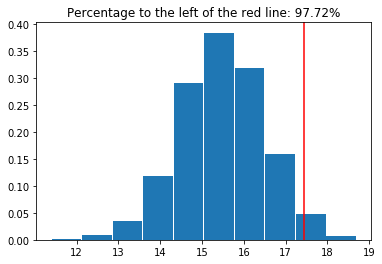

In [37]:
plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=observed_average, color = "r")
plt.title('Percentage to the left of the red line: {:2.2f}%'.format(100*p_value));

If we know that 97.5% of data in the simulated test statistic lies to the left of the observed statistic, then about 2.5% lies to the right.

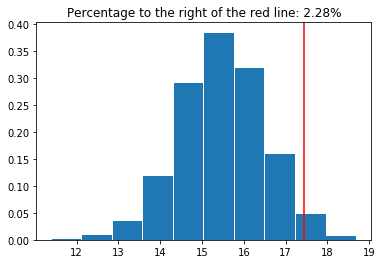

In [38]:
area_to_right = 1 - p_value

plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=observed_average, color = "r")
plt.title('Percentage to the right of the red line: {:2.2f}%'.format(area_to_right * 100));

Suppose we set the threshold to 1%. Since we are studying the right tail, we can compute the 99th percentile.

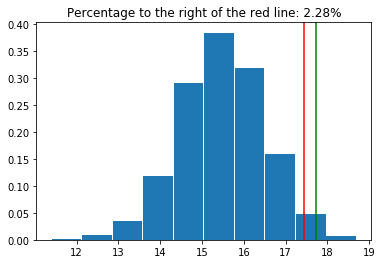

In [39]:
threshold = calculate_percentile(sample_averages, 99)

plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=observed_average, color = "r")
plt.axvline(x=threshold, color = "g")
plt.title('Percentage to the right of the red line: {:2.2f}%'.format(area_to_right * 100));

Beware of working with thresholds to inform rejection of the null hypothesis. Assuming the null hypothesis is valid, we except to have observations in both the left tail and right tail.  

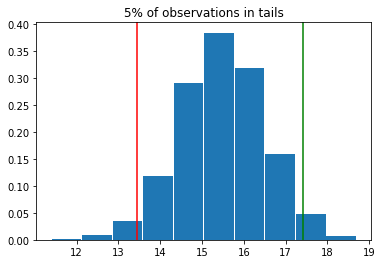

In [40]:
level = 5 # what happens with 10?
right_threshold = calculate_percentile(sample_averages, 100 - (level / 2))
left_threshold = calculate_percentile(sample_averages, level / 2)

plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=left_threshold, color = "r")
plt.axvline(x=right_threshold, color = "g")
plt.title('{}% of observations in tails'.format(level));

If we want to conduct a two-sided test at level 5%, then we would look at 2.5% in the left tail and 2.5% in the right tail. Even with a valid null hypothesis, these thresholds would lead us to falsely rejecting the null hypothesis 5% of the time. 

We can run 100 trials to simulate test statistics. After 100 trials we can simulate an observed statistic. If the null hypothesis is valid, then the observed statistic should be representative of the population. We can repeat the process over 100 replications. For each replication we check to see whether we accept or reject at the 5% level.

In [41]:
replications = 100
trials = 100
class_size = 30
sampling_method = random_sample_average_without_replacement
level = 5 

number_of_rejects = 0
for replication in range(replications):
    sample_averages = generate_simulations(trials, class_size, sampling_method)
    
    observed_average = generate_simulations(1, class_size, sampling_method)
    
    p_value = calculate_pvalue(observed_average[0], sample_averages)
    
    if (p_value < level / 200) or (1 - (level / 200 ) < p_value):
        number_of_rejects = number_of_rejects + 1

Among these replications, we rejected the null hypothesis around 5% of the time

In [42]:
number_of_rejects / replications

0.04

However, thresholds help prevent against falsely accepting the null hypothesis. Assuming the null hypothesis is not valid, then the test statistic will probably be much smaller or much larger than the threshold.

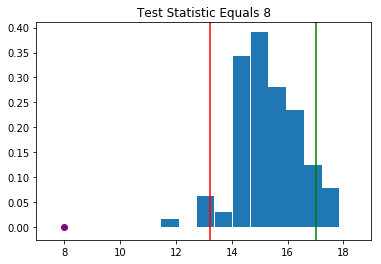

In [43]:
level = 10 
right_threshold = calculate_percentile(sample_averages, 100 - (level / 2))
left_threshold = calculate_percentile(sample_averages, level / 2)

plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.axvline(x=left_threshold, color = "r")
plt.axvline(x=right_threshold, color = "g")
plt.title('{}% of observations in tails'.format(level));

plt.scatter([8],[0], color = 'purple')
plt.xlim([7, 19])
plt.title('Test Statistic Equals 8');


|    _  | Null is True  | Alternative is True  |
| ------------- |:-------------:| -----:|
| Test Favors the Null      | Correct | Error |
| Test Favors the Alternative      | Error     |   Correct |


### Exercise (Smoking)

The table births contains the following variables for 1,174 mother-baby pairs: the baby's birth weight in ounces, the number of gestational days, the mother's age in completed years, the mother's height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy

In [44]:
births = pd.read_csv('baby.csv')
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


There are 715 non-smokers among the women in the sample, and 459 smokers. 

In [45]:
smoking = births[births["Maternal Smoker"] == True]
not_smoking = births[births["Maternal Smoker"] == False]

Do we see an association between birth weight and smoking?

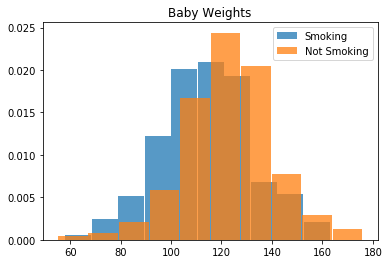

In [46]:
plt.hist(smoking["Birth Weight"], density = True, rwidth = 0.97, alpha = 0.75, label = "Smoking")
plt.hist(not_smoking["Birth Weight"], density = True, rwidth = 0.97, alpha = 0.75, label = "Not Smoking")
plt.title('Baby Weights');
plt.legend();

It appears that smokers have babies with lower weight. Is it chance? Maybe the difference represents an association in the population that could be an indication of a link between smoking and baby weight. 

- Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

- Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

We need a test statistic to validate the hypotheses. We will take $$\text{average weight of smoking mother} - \text{average weight of non-smoking mother}$$

In [75]:
smoking_and_birthweight = births[['Maternal Smoker', 'Birth Weight']]

means_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
means_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [76]:
observed_difference = means_table.loc[True, "Birth Weight"] - means_table.loc[False, "Birth Weight"]
observed_difference

-9.266142572024918

Let us write a function to compute the difference of averages in a table.

In [49]:
def difference_of_means(table, value_label, group_label):
    table_with_relevant_columns = table[[group_label, value_label]]

    means_table = table_with_relevant_columns.groupby(group_label).mean()
    
    return means_table.loc[True, value_label] - means_table.loc[False, value_label]

In [50]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

Now we want to shuffle the group labels. We make a copy of the table.

In [51]:
smoking_and_birthweight = smoking_and_birthweight.copy()
smoking_and_birthweight.head()

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136


We sample without replacement from the `Maternal Smoker` column.

In [52]:
values_to_sample_from = smoking_and_birthweight["Maternal Smoker"]
number_of_samples = len(values_to_sample_from)

shuffled_labels = sample_without_replacement(number_of_samples, values_to_sample_from)

We add the shuffled labels to the table.

In [53]:
smoking_and_birthweight["Shuffled Labels"] = shuffled_labels
smoking_and_birthweight.head()

,Maternal Smoker,Birth Weight,Shuffled Labels
0,False,120,False
1,False,113,False
2,True,128,False
3,True,108,False
4,False,136,False


While some of the labels match between columns, other labels are mismatched. We can compute the test statistic with the shuffled labels.

In [54]:
difference_of_means(smoking_and_birthweight, 'Birth Weight', 'Shuffled Labels')

-1.0098481039657514

Notice the difference between the observed statistic -9.26. We want to repeatedly generate test statistic over many trials. We will write a function to simulate one trial. 

In [55]:
def one_simulated_difference(table, value_label, group_label):
    values_to_sample_from = table[group_label]
    number_of_samples = len(table[group_label])

    shuffled_labels = sample_without_replacement(number_of_samples, values_to_sample_from)
    table["Shuffled Labels"] = shuffled_labels
    
    return difference_of_means(table, value_label, "Shuffled Labels")   

Now we can use the function at each trial to compute another test statistic.

In [72]:
trials = 1000
differences = []

for trial in range(trials):
    new_difference = one_simulated_difference(smoking_and_birthweight, 'Birth Weight', 'Maternal Smoker')
    differences.append(new_difference)

Plotting the simulated statistics we notice that the histogram is symmetric about 0.  This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

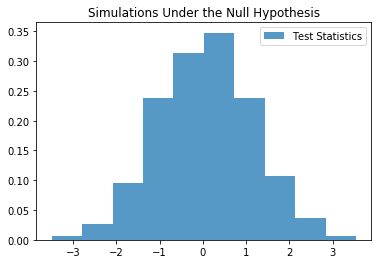

In [73]:
plt.hist(differences, density = True, alpha = 0.75, label = "Test Statistics")
plt.legend()
plt.title('Simulations Under the Null Hypothesis');

However the observed statistic is an outlier

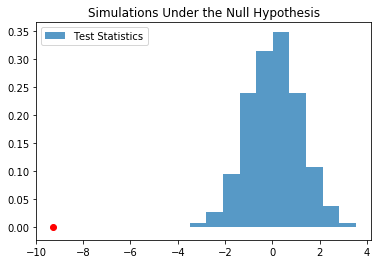

In [77]:
plt.hist(differences, density = True, alpha = 0.75, label = "Test Statistics")
plt.legend()
plt.scatter([observed_difference],[0], color = 'red')
plt.title('Simulations Under the Null Hypothesis');

Note that the p-value is 0

In [59]:
calculate_pvalue(observed_difference, differences)

0.0

The conclusion of the test is that the data favor the alternative over the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.

### Exercise (Height)

We expect that smoking might have an effect on the weight of babies. However the age of the mother might not have any association with baby weight. 

We can use the same approach for studying the relationship between smoking and baby weight. However, we need a column consisting of boolean values True or False. 


We will divide people into two categories
- taller : height greater than 62.5
- shorter : height less than 62.5

We want to add a column to `births` called `"Tall"`.  The extra columns should contain the value `True` for people who are tall and `False` otherwise. 

**(a)** So we should write a function called `check_nonzero` with 
- input: list containing numbers
- output: list containing True or False

Here we have `True` for values greater than 62.5 and `False` for zero. Note that you can use this function in Lab 7 Question 1.

In [60]:
def check_nonzero(list_of_numbers):
    list_for_output = []
    
    # TRY IT!
    
    return list_for_output

**(b)** Use the function to add the column `Tall` to `births`

In [61]:
# TRY IT!

**(c)** Produce a histogram comparing `Birth Weight` and `Maternal Height`.